# Environmental setup

In [1]:
import xarray as xr
import matplotlib.pylab as plt
import matplotlib
import matplotlib as mpl
import matplotlib.dates as md
from matplotlib import ticker
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['axes.linewidth'] = 1.5

import cmocean
import seaborn as sns

import numpy as np
from scipy import stats
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import scipy.spatial.qhull as qhull
import matplotlib.tri as mtri
import pandas as pd
#%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm


import numpy as np
import xarray as xr
import pandas as pd

from scipy import stats
from scipy import optimize
from scipy.stats import binned_statistic
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import scipy.spatial.qhull as qhull

import matplotlib.pylab as plt
import matplotlib
import matplotlib.tri as mtri
import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker
import cmocean

matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['axes.linewidth'] = 1.5

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point


import subprocess
import datetime
from datetime import timedelta
import time

In [27]:
matplotlib.rcParams['figure.dpi'] = 200

# Data read

### CERES-EBAF 4.1

In [3]:
dpath     = '/pool/data/ICDC/atmosphere/ceres_ebaf/DATA/'
dataCERES = xr.open_mfdataset(dpath+'/CERES_EBAF-TOA_Ed4.1_Subset_200003-202203.nc')
dataCERES

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180, time: 265)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2022-03-15
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    solar_mon                    (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldarea_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 dask.array<chunksize=(265, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

### HadCRUT 5.0

In [4]:
dpath   = '/work/mh0731/m300793/data/CRUTEM/'
dataCRU = xr.open_mfdataset(dpath+'/CRUTEM.5.0.1.0.anomalies.nc')
dataHad = xr.open_mfdataset(dpath+'/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
dataABS = xr.open_mfdataset(dpath+'/absolute_v5.nc')
dataHad

<xarray.Dataset>
Dimensions:           (time: 2064, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-12-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 dask.array<chunksize=(2064, 36, 72), meta=np.ndarray>
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(2064, 2), meta=np.ndarray>
    latitude_bnds     (latitude, bnds) float64 dask.array<chunksize=(36, 2), meta=np.ndarray>
    longitude_bnds    (longitude, bnds) float64 dask.array<chunksize=(72, 2), meta=np.ndarray>
    realization_bnds  (bnds) int64 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-01-14T11:05:40+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

### NextGEMS

In [7]:
dpath     = '/work/mh0731/m300793/data/ngc3026/'
dataNGC26_rad = xr.open_mfdataset(dpath+'/radiation_daily_1x1.nc')
dataNGC26_tem = xr.open_mfdataset(dpath+'/temperature_daily_1x1.nc')
dataNGC26 = xr.merge([dataNGC26_rad, dataNGC26_tem])

In [8]:
dpath     = '/work/mh0731/m300793/data/ngc3020/'
dataNGC20_rad = xr.open_mfdataset(dpath+'/radiation_daily_1x1.nc')
dataNGC20_tem = xr.open_mfdataset(dpath+'/temperature_daily_1x1.nc')
dataNGC20 = xr.merge([dataNGC20_rad, dataNGC20_tem])

In [9]:
dpath     = '/work/mh0731/m300793/data/ngc3019/'
dataNGC19_rad = xr.open_mfdataset(dpath+'/radiation_daily_1x1.nc')
dataNGC19_tem = xr.open_mfdataset(dpath+'/temperature_daily_1x1.nc')
dataNGC19 = xr.merge([dataNGC19_rad, dataNGC19_tem])

In [10]:
dpath     = '/work/mh0731/m300793/data/ngc3002/'
dataNGC02_rad = xr.open_mfdataset(dpath+'/radiation_daily_1x1.nc')
dataNGC02_tem = xr.open_mfdataset(dpath+'/temperature_daily_1x1.nc')
dataNGC02 = xr.merge([dataNGC02_rad, dataNGC02_tem])

In [11]:
dpath     = '/work/mh0731/m300793/data/ngc2009/linked_data/'
dataNGC09_rad = xr.open_mfdataset(dpath+'/radiation_daily_1x1.nc')
dataNGC09_tem = xr.open_mfdataset(dpath+'/temperature_daily_1x1.nc')
dataNGC09 = xr.merge([dataNGC09_rad, dataNGC09_tem])

# Processing

### Retrieve 2m temperature

In [12]:
dataCRU = dataCRU.sel(time=slice('2001','2020'))
dataHad = dataHad.sel(time=slice('2001','2020'))

In [13]:
tdim, ydim, xdim = 240, 36, 72

tas_had_temp = np.zeros((tdim, ydim, xdim))
mm = 0
for tt in np.arange(0,tdim):
    mm = np.mod(tt,12)
    tas_had_temp[tt,:,:] = dataHad['tas_mean'].isel(time=tt).values \
                         + dataABS['tem'].isel(time=mm).values \
                         + 273.15


had_tas = xr.Dataset(
                        {
                        "tas" : (("time", "lat", "lon"), tas_had_temp,),
                        },
                        coords={
                                "time": dataHad['time'].values,
                                "lat":  dataHad['latitude'].values,
                                "lon":  dataHad['longitude'].values,
                                },
                    )
had_tas

<xarray.Dataset>
Dimensions:  (time: 240, lat: 36, lon: 72)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-16T12:00:00 ... 2020-12-16T12:00:00
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Data variables:
    tas      (time, lat, lon) float64 245.0 244.2 246.4 ... 247.4 247.5 247.3

### Compute weighting

In [14]:
ceres_weights = xr.DataArray(np.cos(np.deg2rad(dataCERES['lat'])))
ceres_weights.name = "weights"
ceres_weights

<xarray.DataArray 'weights' (lat: 180)>
array([0.00872656, 0.02617699, 0.04361945, 0.06104851, 0.07845908,
       0.09584576, 0.11320324, 0.13052624, 0.14780948, 0.16504757,
       0.18223551, 0.19936794, 0.21643965, 0.23344542, 0.25037998,
       0.26723838, 0.28401536, 0.30070582, 0.3173047 , 0.33380693,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.4146933 ,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.5075384 , 0.5224986 , 0.5372996 , 0.551937  , 0.56640625,
       0.58070296, 0.59482276, 0.6087614 , 0.62251467, 0.6360782 ,
       0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.83388585, 0.8241262 ,
       0.8141155 , 0.8038569 , 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.64944804,
       0.6360782 , 0.62251467, 0.6087614 , 0.59482276, 0.58070296,
       0.56640625, 0.551937  , 0.5372996 , 0.5224986 , 0.5075384 ,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.4146933 , 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.33380693, 0.3173047 , 0.30070582, 0.28401536, 0.26723838,
       0.25037998, 0.23344542, 0.21643965, 0.19936794, 0.18223551,
       0.16504757, 0.14780948, 0.13052624, 0.11320324, 0.09584576,
       0.07845908, 0.06104851, 0.04361945, 0.02617699, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.  90.]

In [15]:
had_weights = xr.DataArray(np.cos(np.deg2rad(had_tas['lat'])))
had_weights.name = "weights"
had_weights

<xarray.DataArray 'weights' (lat: 36)>
array([0.04361939, 0.13052619, 0.21643961, 0.3007058 , 0.38268343,
       0.46174861, 0.53729961, 0.60876143, 0.67559021, 0.73727734,
       0.79335334, 0.84339145, 0.88701083, 0.92387953, 0.95371695,
       0.97629601, 0.99144486, 0.99904822, 0.99904822, 0.99144486,
       0.97629601, 0.95371695, 0.92387953, 0.88701083, 0.84339145,
       0.79335334, 0.73727734, 0.67559021, 0.60876143, 0.53729961,
       0.46174861, 0.38268343, 0.3007058 , 0.21643961, 0.13052619,
       0.04361939])
Coordinates:
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5

In [16]:
ngc_weights = xr.DataArray(np.cos(np.deg2rad(dataNGC19['lat'])))
ngc_weights.name = "weights"
ngc_weights

<xarray.DataArray 'weights' (lat: 180)>
array([8.72664515e-04, 1.83249314e-02, 3.57716163e-02, 5.32074049e-02,
       7.06269859e-02, 8.80250533e-02, 1.05396307e-01, 1.22735457e-01,
       1.40037220e-01, 1.57296326e-01, 1.74507518e-01, 1.91665554e-01,
       2.08765206e-01, 2.25801267e-01, 2.42768546e-01, 2.59661876e-01,
       2.76476110e-01, 2.93206127e-01, 3.09846830e-01, 3.26393151e-01,
       3.42840049e-01, 3.59182516e-01, 3.75415571e-01, 3.91534272e-01,
       4.07533707e-01, 4.23409003e-01, 4.39155326e-01, 4.54767877e-01,
       4.70241901e-01, 4.85572685e-01, 5.00755559e-01, 5.15785898e-01,
       5.30659124e-01, 5.45370706e-01, 5.59916162e-01, 5.74291063e-01,
       5.88491029e-01, 6.02511735e-01, 6.16348910e-01, 6.29998339e-01,
       6.43455865e-01, 6.56717387e-01, 6.69778868e-01, 6.82636327e-01,
       6.95285848e-01, 7.07723579e-01, 7.19945730e-01, 7.31948579e-01,
       7.43728469e-01, 7.55281812e-01, 7.66605089e-01, 7.77694851e-01,
       7.88547719e-01, 7.99160389e-01, 8.09529626e-01, 8.19652272e-01,
       8.29525245e-01, 8.39145536e-01, 8.48510215e-01, 8.57616430e-01,
       8.66461406e-01, 8.75042450e-01, 8.83356948e-01, 8.91402366e-01,
       8.99176255e-01, 9.06676246e-01, 9.13900054e-01, 9.20845480e-01,
       9.27510407e-01, 9.33892806e-01, 9.39990732e-01, 9.45802327e-01,
       9.51325822e-01, 9.56559534e-01, 9.61501869e-01, 9.66151321e-01,
       9.70506473e-01, 9.74566001e-01, 9.78328665e-01, 9.81793322e-01,
...
       9.84655841e-01, 9.81460297e-01, 9.77965791e-01, 9.74173387e-01,
       9.70084240e-01, 9.65699596e-01, 9.61020791e-01, 9.56049249e-01,
       9.50786486e-01, 9.45234104e-01, 9.39393794e-01, 9.33267336e-01,
       9.26856596e-01, 9.20163526e-01, 9.13190165e-01, 9.05938638e-01,
       8.98411153e-01, 8.90610004e-01, 8.82537565e-01, 8.74196298e-01,
       8.65588742e-01, 8.56717519e-01, 8.47585332e-01, 8.38194961e-01,
       8.28549269e-01, 8.18651193e-01, 8.08503747e-01, 7.98110023e-01,
       7.87473188e-01, 7.76596480e-01, 7.65483213e-01, 7.54136773e-01,
       7.42560616e-01, 7.30758267e-01, 7.18733323e-01, 7.06489445e-01,
       6.94030364e-01, 6.81359874e-01, 6.68481835e-01, 6.55400171e-01,
       6.42118865e-01, 6.28641964e-01, 6.14973572e-01, 6.01117853e-01,
       5.87079028e-01, 5.72861373e-01, 5.58469219e-01, 5.43906950e-01,
       5.29179001e-01, 5.14289859e-01, 4.99244060e-01, 4.84046186e-01,
       4.68700867e-01, 4.53212777e-01, 4.37586634e-01, 4.21827198e-01,
       4.05939269e-01, 3.89927688e-01, 3.73797330e-01, 3.57553111e-01,
       3.41199977e-01, 3.24742910e-01, 3.08186923e-01, 2.91537060e-01,
       2.74798392e-01, 2.57976017e-01, 2.41075061e-01, 2.24100671e-01,
       2.07058017e-01, 1.89952292e-01, 1.72788705e-01, 1.55572485e-01,
       1.38308876e-01, 1.21003137e-01, 1.03660539e-01, 8.62863658e-02,
       6.88859084e-02, 5.14644678e-02, 3.40273505e-02, 1.65798682e-02])
Coordinates:
  * lat      (lat) float64 -89.95 -88.95 -87.95 -86.95 ... 87.05 88.05 89.05
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          radian
    axis:           Y

### Compute global mean

##### OBS

In [17]:
ceres_toanet_mean = dataCERES['toa_net_all_mon'].sel(time=slice('2001','2020')) \
                    .weighted(ceres_weights).mean(('lat','lon')).values

had_tas_mean      = had_tas['tas'].weighted(had_weights).mean(('lat','lon')).values

##### Model

In [18]:
ngc26_toanet_mean = dataNGC26['rsdt'] - dataNGC26['rsut'] - dataNGC26['rlut']
ngc26_toanet_mean = ngc26_toanet_mean.resample(time='1M').mean('time')
ngc26_toanet_mean = ngc26_toanet_mean.weighted(ngc_weights).mean(('lat','lon')).values

ngc26_tas_mean = dataNGC26['tas'].resample(time='1M').mean('time')
ngc26_tas_mean = ngc26_tas_mean.weighted(ngc_weights).mean(('lat','lon')).values

In [19]:
ngc20_toanet_mean = dataNGC20['rsdt'] - dataNGC20['rsut'] - dataNGC20['rlut']
ngc20_toanet_mean = ngc20_toanet_mean.resample(time='1M').mean('time')
ngc20_toanet_mean = ngc20_toanet_mean.weighted(ngc_weights).mean(('lat','lon')).values

ngc20_tas_mean = dataNGC20['tas'].resample(time='1M').mean('time')
ngc20_tas_mean = ngc20_tas_mean.weighted(ngc_weights).mean(('lat','lon')).values

In [20]:
ngc19_toanet_mean = dataNGC19['rsdt'] - dataNGC19['rsut'] - dataNGC19['rlut']
ngc19_toanet_mean = ngc19_toanet_mean.resample(time='1M').mean('time')
ngc19_toanet_mean = ngc19_toanet_mean.weighted(ngc_weights).mean(('lat','lon')).values

ngc19_tas_mean = dataNGC19['tas'].resample(time='1M').mean('time')
ngc19_tas_mean = ngc19_tas_mean.weighted(ngc_weights).mean(('lat','lon')).values

In [21]:
ngc02_toanet_mean = dataNGC02['rsdt'] - dataNGC02['rsut'] - dataNGC02['rlut']
ngc02_toanet_mean = ngc02_toanet_mean.resample(time='1M').mean('time')
ngc02_toanet_mean = ngc02_toanet_mean.weighted(ngc_weights).mean(('lat','lon')).values

ngc02_tas_mean = dataNGC02['tas'].resample(time='1M').mean('time')
ngc02_tas_mean = ngc02_tas_mean.weighted(ngc_weights).mean(('lat','lon')).values

In [22]:
ngc09_toanet_mean = dataNGC09['rsdt'] - dataNGC09['rsut'] - dataNGC09['rlut']
ngc09_toanet_mean = ngc09_toanet_mean.resample(time='1M').mean('time')
ngc09_toanet_mean = ngc09_toanet_mean.weighted(ngc_weights).mean(('lat','lon')).values

ngc09_tas_mean = dataNGC09['tas'].resample(time='1M').mean('time')
ngc09_tas_mean = ngc09_tas_mean.weighted(ngc_weights).mean(('lat','lon')).values

# Plot

### Reproduce figure7

In [23]:
ngc26_MM = np.arange(len(ngc26_tas_mean)) + 1
ngc20_MM = np.arange(len(ngc20_tas_mean)) + 1
ngc19_MM = np.arange(len(ngc19_tas_mean)) + 1
ngc02_MM = np.arange(len(ngc02_tas_mean)) + 1
ngc09_MM = np.concatenate( (np.arange(12)+1, np.arange(12)+1) )

In [24]:
def add_ngc_plot(ax, input_tas, input_toanet, color, label, MM):
    """ Add plot for given ngc simulation data set
    input_tas(xarray): 2m temperature data
    input_toanet(xarray): TOA net radiation data
    color(string): color for line
    label(string): label
    MM(integer list): list of month
    """    
    
    input_tas = input_tas - 273.15
    ax.plot(input_tas, input_toanet, c=color, label=label)

    for a,b,c in zip(input_tas, input_toanet, MM):
        ax.scatter(a, b, c=color, s=70)
        ax.text(a, b, c, ha='center', va='center', size=8, c='white')

posx and posy should be finite values
posx and posy should be finite values


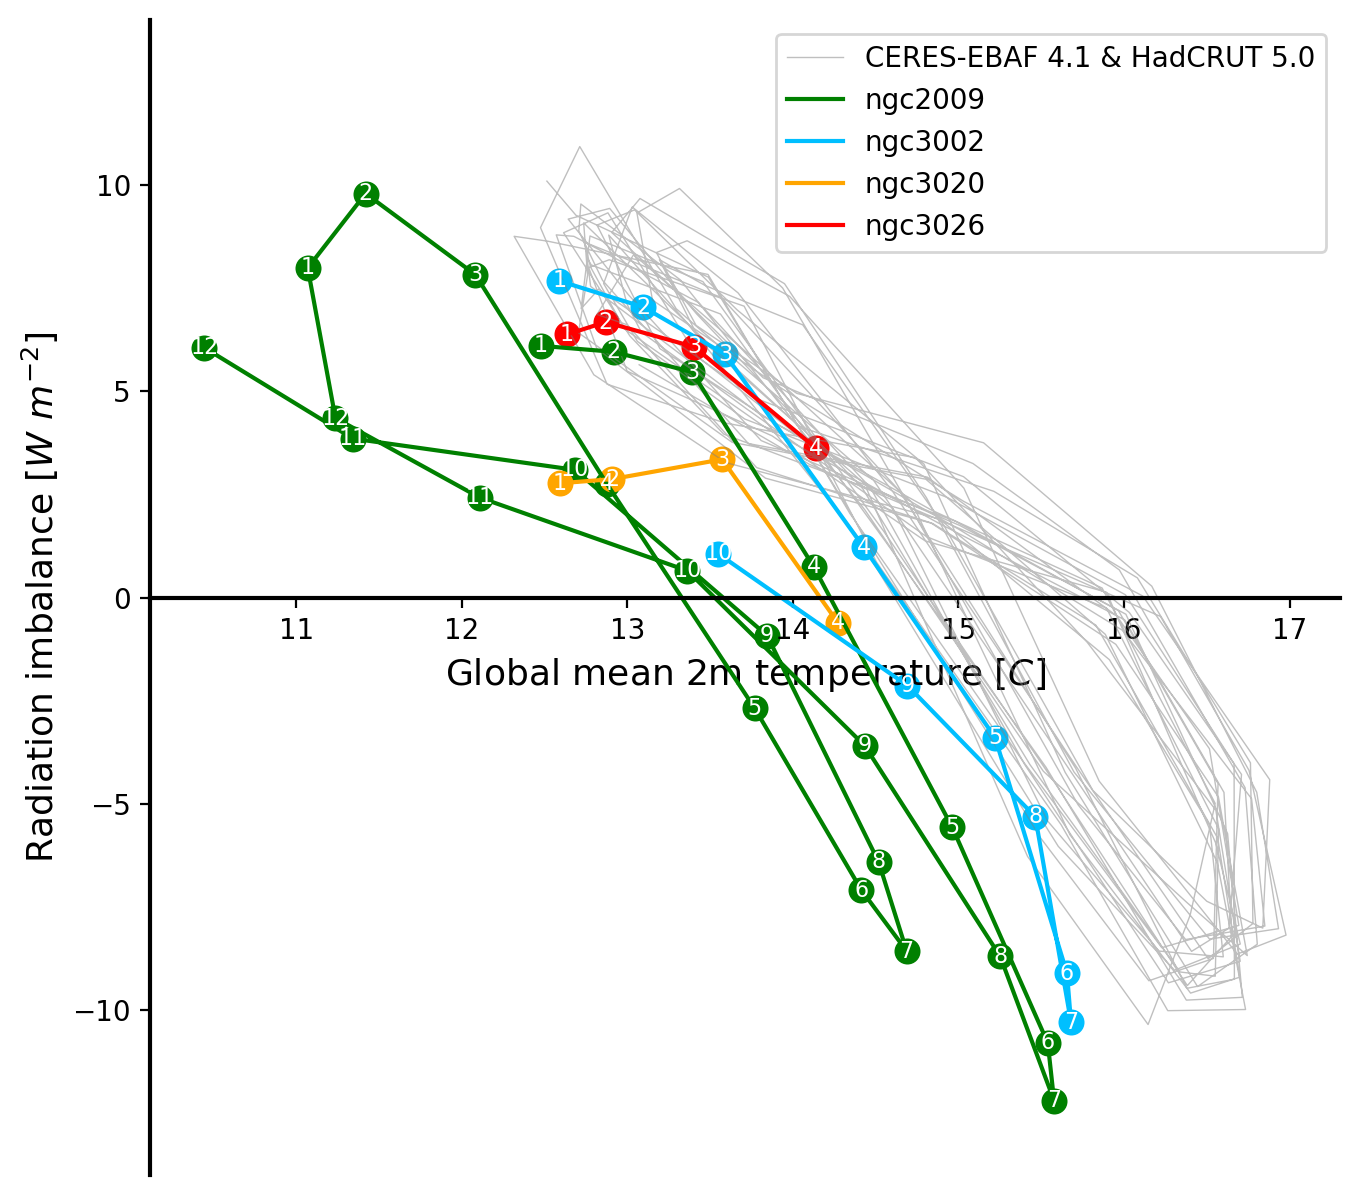

In [32]:
rmax, cmax = 2, 2
fig, ax = plt.subplots(nrows=rmax,ncols=cmax, figsize=(13,12),)

rr, cc = 0, 0
ax[rr,cc].plot(had_tas_mean-273.15, ceres_toanet_mean, c='gray', 
               linewidth=0.5, alpha=0.5, label='CERES-EBAF 4.1 & HadCRUT 5.0')

add_ngc_plot(ax[rr,cc], ngc09_tas_mean, ngc09_toanet_mean, 'g',      'ngc2009', ngc09_MM)
add_ngc_plot(ax[rr,cc], ngc02_tas_mean, ngc02_toanet_mean, 'deepskyblue',   'ngc3002', ngc02_MM)
add_ngc_plot(ax[rr,cc], ngc20_tas_mean, ngc20_toanet_mean, 'orange', 'ngc3020', ngc20_MM)
add_ngc_plot(ax[rr,cc], ngc26_tas_mean, ngc26_toanet_mean, 'r',      'ngc3026', ngc26_MM)
#add_ngc_plot(ax[rr,cc], ngc19_tas_mean, ngc19_toanet_mean, 'b',      'ngc3019', ngc19_MM)




# ax[rr,cc].set_xlim(10.8, 17.3)
ax[rr,cc].set_xlabel('Global mean 2m temperature [$C$]', fontsize=13)
ax[rr,cc].set_ylim(-14.0, 14.0)
ax[rr,cc].set_ylabel('Radiation imbalance [$W \ m^{-2}$]', fontsize=13)
# set the x-spine
ax[rr,cc].spines['bottom'].set_position('zero')
ax[rr,cc].spines[['right', 'top']].set_visible(False)

ax[rr,cc].legend()
leg=ax[rr,cc].legend()
# leg.get_frame().set_linewidth(0.0)

rr, cc = 0, 1
ax[rr,cc].set_visible(False)
rr, cc = 1, 0
ax[rr,cc].set_visible(False)
rr, cc = 1, 1
ax[rr,cc].set_visible(False)

plt.tight_layout()